# ADS509 Module2- Mohammad Mahmoudighaznavi

# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we explore some of the textual features of those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [4]:
import os
import re
#!pip install emoji
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

In [47]:
# Add any additional import statements you need here
#!pip install lexical-diversity
from lexical_diversity import lex_div as ld
#!pip install advertools
import advertools as adv
from operator import itemgetter

In [28]:
# change `data_location` to the location of the folder on your machine.
#data_location = "/users/chandler/dropbox/teaching/repos/ads-tm-api-scrape/"
data_location = "/Users/Mohammad/Downloads/M1 Assignment Data/M1 Results/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [22]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # Fill in the correct values here. 
    num_tokens = len(tokens)
    
    num_unique_tokens = len(Counter(tokens).keys())
    
    lexical_diversity = ld.ttr(tokens)
    
    num_characters = 0
    for word in tokens:
        num_characters+= len(word)
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])

In [23]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.


Q: Why is it beneficial to use assertion statements in your code? 

A: Assertion allows us to test our codes when a condition returns true or debug our codes if AssertionError raise. 

## Data Input
Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionaryta Input
 with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [29]:
lyrics_data= {"artist":[], "song":[],"lyrics": []}
path1=data_location+lyrics_folder

for artist in os.listdir(path1):
    for song in os.listdir(os.path.join (path1+artist)):
        song_name= song.split("_")[1].split(".")[0]
        with open (os.path.join(path1+artist, song),'r') as f:
            lyric=f.read()
        
        lyrics_data['artist'].append(artist)
        lyrics_data['song'].append(song_name)
        lyrics_data['lyrics'].append(lyric)
        

In [30]:
twitter_files = os.listdir(data_location + twitter_folder)
desc_files = [f for f in twitter_files if "followers_data" in f]
tweets_data= defaultdict(list)
for f in desc_files :
    artist = f.split("_")[0]
        
    with open(data_location + twitter_folder + f,'r', encoding='utf8') as infile :
        next(infile)
        for idx, line in enumerate(infile.readlines()) :
            line = line.strip().split("\t")
            if len(line) == 7 :
                tweets_data[artist].append(line[6])
tweets_data= dict(tweets_data)

## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [31]:
punctuation = set(punctuation) # speeds up comparison

In [32]:
# create your clean twitter data here
#convrt to dataframe
tweets_df= pd.DataFrame(
    [(k, val) for k, vals in tweets_data.items() for val in vals], 
    columns=['artist', 'description']
)

tweets_df

,artist,description
0,cher,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜
1,cher,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡
2,cher,csu
3,cher,Writer @Washinformer @SpelmanCollege alumna #D...
4,cher,I’m unemployed and live with my parents. MOOPS!
...,...,...
2191118,robynkonichiwa,"singer of songs, type 1 diabetic, tired $jakel..."
2191119,robynkonichiwa,Dadx2/ Con-Arch/ Photographer/ DK #stemgrønnes...
2191120,robynkonichiwa,A year to change a life is still a year ✨😌
2191121,robynkonichiwa,Head of Consumer - Mango. Made in Melbourne. R...


In [33]:
#fold to lowercase 
tweets_df['lower_description']= tweets_df['description'].apply(lambda x : x.strip().lower())


# Remove punctuation characters
def re_punctuations(text):
       return''.join(ch for ch in text if ch not in punctuation)
    
tweets_df['no_punctuation'] = tweets_df['lower_description']. apply (re_punctuations)


#Split on whitespace
tweets_df['no_whitespace']=tweets_df['no_punctuation'].apply(lambda x : x.split())

# Remove stopwords
tweets_df['clean_text']=tweets_df['no_whitespace'].apply(lambda x: [item for item in x if item not in sw])


# drop extra columns
tweets_df.drop(columns=['lower_description','no_punctuation' ,'no_whitespace'], inplace=True)

In [34]:
# create your clean lyrics data here
#convrt to dataframe
lyrics_df=pd.DataFrame.from_dict(lyrics_data)
lyrics_df

,artist,song,lyrics
0,cher,88degrees,"""88 Degrees""\n\n\n\nStuck in L.A., ain't got n..."
1,cher,adifferentkindoflovesong,"""A Different Kind Of Love Song""\n\n\n\nWhat if..."
2,cher,afterall,"""After All""\n\n\n\nWell, here we are again\nI ..."
3,cher,again,"""Again""\n\n\n\nAgain evening finds me at your ..."
4,cher,alfie,"""Alfie""\n\n\n\nWhat's it all about, Alfie?\nIs..."
...,...,...,...
415,robyn,wedancetothebeat114528,"""We Dance To The Beat""\n\n\n\nWe dance to the ..."
416,robyn,wheredidourlovego,"""Where Did Our Love Go""\n\n\n\nThoughts about ..."
417,robyn,whosthatgirl,"""Who's That Girl""\n\n\n\nGood girls are pretty..."
418,robyn,witheveryheartbeat,"""With Every Heartbeat""\n\n\n\nMaybe we could m..."


In [35]:
#fold to lowercase 
lyrics_df['lower_lyrics']= lyrics_df['lyrics'].apply(lambda x : x.strip().lower())


# Remove punctuation characters
def re_punctuations(text):
       return''.join(ch for ch in text if ch not in punctuation)
    
lyrics_df['no_punctuation'] = lyrics_df['lower_lyrics']. apply (re_punctuations)


#Split on whitespace
lyrics_df['no_whitespace']=lyrics_df['no_punctuation'].apply(lambda x : x.split())

# Remove stopwords
lyrics_df['clean_text']=lyrics_df['no_whitespace'].apply(lambda x: [item for item in x if item not in sw])


# drop extra columns
lyrics_df.drop(columns=['lower_lyrics','no_punctuation' ,'no_whitespace'], inplace=True)

lyrics_df.head()

,artist,song,lyrics,clean_text
0,cher,88degrees,"""88 Degrees""\n\n\n\nStuck in L.A., ain't got n...","[88, degrees, stuck, la, aint, got, friends, h..."
1,cher,adifferentkindoflovesong,"""A Different Kind Of Love Song""\n\n\n\nWhat if...","[different, kind, love, song, world, crazy, sa..."
2,cher,afterall,"""After All""\n\n\n\nWell, here we are again\nI ...","[well, guess, must, fate, weve, tried, deep, i..."
3,cher,again,"""Again""\n\n\n\nAgain evening finds me at your ...","[evening, finds, door, ask, could, try, dont, ..."
4,cher,alfie,"""Alfie""\n\n\n\nWhat's it all about, Alfie?\nIs...","[alfie, whats, alfie, moment, live, whats, sor..."


## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [36]:
# calls to descriptive_stats here
#cher tweet

tweets_cher=tweets_df.loc[tweets_df['artist']=='cher']

# convert list of elements to string object
description_cher=list(tweets_cher['clean_text'])

description_cher_str=[]
counter=0
for text in description_cher:
    myString = " ".join(description_cher[counter])
    description_cher_str.append(myString)
    counter+=1

print('cher tweet:')

assert(descriptive_stats(description_cher_str, verbose=True))

cher tweet:
There are 2001090 tokens in the data.
There are 1797531 unique tokens in the data.
There are 106635955 characters in the data.
The lexical diversity is 0.898 in the data.


In [37]:
#cher lyrics

song_cher=lyrics_df.loc[lyrics_df['artist']=='cher']
song_cher=list(song_cher['clean_text'])

# convert nested list to a flat list
flat_list_cher = [element for innerList in song_cher for element in innerList]

assert(descriptive_stats(flat_list_cher, verbose=True))

There are 35916 tokens in the data.
There are 3703 unique tokens in the data.
There are 172696 characters in the data.
The lexical diversity is 0.103 in the data.


In [38]:
#robyn tweet

tweets_robyn=tweets_df.loc[tweets_df['artist']=='robynkonichiwa']

# convert list of elements to string object
description_robyn=list(tweets_robyn['clean_text'])

description_robyn_str=[]
counter=0
for text in description_robyn:
    myString = " ".join(description_robyn[counter])
    description_robyn_str.append(myString)
    counter+=1

print('robyn tweet:')

assert(descriptive_stats(description_robyn_str, verbose=True))

robyn tweet:
There are 190033 tokens in the data.
There are 180322 unique tokens in the data.
There are 10434591 characters in the data.
The lexical diversity is 0.949 in the data.


In [39]:
# robyn lyrics

song_robyn=lyrics_df.loc[lyrics_df['artist']=='robyn']
song_robyn=list(song_robyn['clean_text'])

# convert nested list to a flat list
flat_list_robyn = [element for innerList in song_robyn for element in innerList]

assert(descriptive_stats(flat_list_robyn, verbose=True))

There are 15227 tokens in the data.
There are 2156 unique tokens in the data.
There are 73988 characters in the data.
The lexical diversity is 0.142 in the data.


Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: Because stopwords often appear frequently in sentences, retaining them in the data is more likely to result in the top 5 words being stopwords, which may not provide significant information.

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: Lexical diversity for Cher’s lyrics is about 0.103 and for Robyn is about 0.142. Since low score represent songs as simple and similar, and suggests a higher repetition of words or phrases. On the other hand, higher value means that the lyrics contain many different word types. Cher, as I expected, has simpler songs to memorize compared to Robyn's, whose songs seem to exhibit more lexical diversity. 



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [40]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [44]:
#cher emogies

emoji_cher=tweets_df.loc[tweets_df['artist']=='cher','description']
emoji_cher=list(emoji_cher)
emoji_summary = adv.extract_emoji(emoji_cher)

# top 10 emojies 
emoji_summary['top_emoji'][0:10]

[('❤️', 45799),
 ('❤', 31788),
 ('🏳️\u200d🌈', 30454),
 ('✨', 29468),
 ('♥', 28401),
 ('💙', 21379),
 ('🌊', 20223),
 ('🌈', 16898),
 ('💜', 16550),
 ('🇺🇸', 14686)]

In [45]:
#robyn emogies

emoji_robyn=tweets_df.loc[tweets_df['artist']=='robynkonichiwa','description']
emoji_robyn=list(emoji_robyn)
emoji_summary_r = adv.extract_emoji(emoji_robyn)

# top 10 emojies 
emoji_summary_r['top_emoji'][0:10]

[('🏳️\u200d🌈', 3249),
 ('❤️', 2887),
 ('♥', 2886),
 ('✨', 2223),
 ('❤', 1771),
 ('🌈', 1417),
 ('💙', 809),
 ('💜', 739),
 ('🎶', 710),
 ('🖤', 615)]

### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [48]:
# cher hashtags

count_hashtag = Counter()
for element in emoji_cher:
    for hashtags in re.findall('#(\w+)', element):
        count_hashtag[hashtags] += 1

top10_hashtag = dict(sorted(count_hashtag.items(), key=itemgetter(1), reverse=True)[:10])
top10_hashtag

{'BLM': 9535,
 'Resist': 6036,
 'BlackLivesMatter': 4681,
 'resist': 3797,
 'FBR': 3239,
 'TheResistance': 2995,
 'blacklivesmatter': 2645,
 '1': 2627,
 'Resistance': 1919,
 'RESIST': 1823}

In [49]:
# robyn hashtags

count_hashtag = Counter()
for element in emoji_robyn:
    for hashtags in re.findall('#(\w+)', element):
        count_hashtag[hashtags] += 1

top10_hashtag = dict(sorted(count_hashtag.items(), key=itemgetter(1), reverse=True)[:10])
top10_hashtag

{'BlackLivesMatter': 337,
 'BLM': 306,
 'blacklivesmatter': 208,
 '1': 199,
 'music': 174,
 'Music': 113,
 'EDM': 86,
 'LGBTQ': 75,
 'TeamFollowBack': 59,
 'blm': 56}

### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [50]:
# cher title

cher_title=lyrics_df.loc[lyrics_df['artist']=='cher','lyrics']
cher_title=list(cher_title)


song_title=[]
counter=0
for i in cher_title:
    title=i.split('\n')[0]
    song_title.append(title)
    counter+=1
    

song_title=str(song_title)
t1=re.sub( ' "  ','' ,song_title)
t2=re_punctuations(t1)
t3=t2.lower()
t4=t3.split()
t5= [word for word in t4 if not word in stopwords.words()]


# top 5 words
frequency={}
for item in t5:
   # checking the element in dictionary
   if item in frequency:
      # incrementing the counr
      frequency[item] += 1
   else:
      # initializing the count
      frequency[item] = 1
    

for key, value in sorted(frequency.items(), key=lambda kv: kv[1], reverse=True)[:5]:
     print("%s: %s" % (key, value))

love: 38
song: 11
believe: 6
heart: 6
time: 6


In [51]:
# robyn title

robyn_title=lyrics_df.loc[lyrics_df['artist']=='robyn','lyrics']
robyn_title=list(robyn_title)


song_title=[]
counter=0
for i in robyn_title:
    title=i.split('\n')[0]
    song_title.append(title)
    counter+=1
    

song_title=str(song_title)
t1=re.sub( ' "  ','' ,song_title)
t2=re_punctuations(t1)
t3=t2.lower()
t4=t3.split()
t5= [word for word in t4 if not word in stopwords.words()]


# top 5 words
frequency={}
for item in t5:
   # checking the element in dictionary
   if item in frequency:
      # incrementing the counr
      frequency[item] += 1
   else:
      # initializing the count
      frequency[item] = 1
    

for key, value in sorted(frequency.items(), key=lambda kv: kv[1], reverse=True)[:5]:
   print("%s: %s" % (key, value))

love: 6
girl: 3
hang: 3
baby: 2
music: 2


### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


artist
Artist 1    AxesSubplot(0.125,0.125;0.775x0.755)
Artist 2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: length, dtype: object

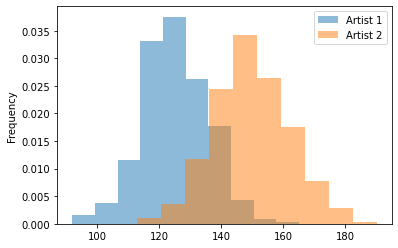

In [52]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: It matches sequences of one or more consecutive whitespace characters in a text string.


In [53]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

artist
cher     AxesSubplot(0.125,0.125;0.775x0.755)
robyn    AxesSubplot(0.125,0.125;0.775x0.755)
Name: length, dtype: object

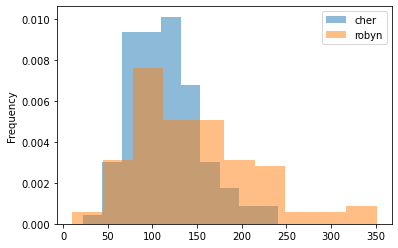

In [54]:
# Your lyric length comparison chart here. 
lyrics_df['length'] = lyrics_df['clean_text'].map(len)
lyrics_df.head()

lyrics_df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)